In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Evaluating the initial results of the GPT annotations based on codebook V1
Evaluating the accuracy, recall, precision, consistency.
Visualize confusionmatrix.

In [4]:
def load_csv_files(root_folder):
    # Dictionary to hold the dataframes
    dataframes = {}

    # Walk through the directory
    for subdir, _, files in os.walk(root_folder):
        folder_name = os.path.basename(subdir)

        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(subdir, file)
                df_name = f"{folder_name}_{os.path.splitext(file)[0]}"

                # Read the CSV file into a dataframe
                df = pd.read_csv(file_path)

                # Store the dataframe in the dictionary
                dataframes[df_name] = df

    return dataframes

# Usage example:
root_folder = 'RESULTS'
dataframes = load_csv_files(root_folder)

### Performance determination of relevance

In [6]:
performance_relevance_T06I7 = dataframes['V6_relevance_T0.6B20I7_performance_metrics']
performance_relevance_T06I5 = dataframes['V6_relevance_T0.6B20I5_performance_metrics']
performance_relevance_T02I5 = dataframes['V6_relevance_T0.2B20I5_performance_metrics']

In [9]:
# Add test indicator to dataframe
performance_relevance_T06I7['Test'] = 'T06I7'
performance_relevance_T06I5['Test'] = 'T06I5'
performance_relevance_T02I5['Test'] = 'T02I5'

In [10]:
# Combine dataframes
performance_relevance = pd.concat([performance_relevance_T06I5,performance_relevance_T02I5])
performance_relevance = pd.concat([performance_relevance, performance_relevance_T06I7])

# Print combined dataframe
performance_relevance

,Category,Accuracy,Precision,Recall,F1,Test
0,relevance_0,0.577114,0.834975,0.433504,0.570707,T06I5
1,relevance_1,0.655058,0.224274,0.410628,0.290102,T06I5
2,relevance_2,0.716418,0.312312,0.479263,0.378182,T06I5
0,relevance_0,0.564677,0.850136,0.398977,0.543081,T02I5
1,relevance_1,0.637645,0.232558,0.483092,0.313972,T02I5
2,relevance_2,0.691542,0.289973,0.493088,0.365188,T02I5
0,relevance_0,0.567993,0.835476,0.415601,0.555081,T06I7
1,relevance_1,0.652570,0.226804,0.425121,0.295798,T06I7
2,relevance_2,0.715589,0.309091,0.470046,0.372943,T06I7


### Evaluating all iterations in labelling for relevance


In [13]:
all_relevance_T06I7 = dataframes['V6_relevance_T0.6B20I7_gpt_out_all_iterations']
all_relevance_T06I5 = dataframes['V6_relevance_T0.6B20I5_gpt_out_all_iterations']
all_relevance_T02I5 = dataframes['V6_relevance_T0.2B20I5_gpt_out_all_iterations']

all_relevance_T06I5

,unique_id,text,relevance_0_x,relevance_1_x,relevance_2_x,llm_query,relevance_0_y,relevance_1_y,relevance_2_y,iteration
0,1,"On beha lf of the government of Japan , I wou...",1,0,0,"1 On beha lf of the government of Japan , I w...",1,0,0,1
1,1,"On beha lf of the government of Japan , I wou...",1,0,0,"1 On beha lf of the government of Japan , I w...",1,0,0,2
2,1,"On beha lf of the government of Japan , I wou...",1,0,0,"1 On beha lf of the government of Japan , I w...",1,0,0,4
3,1,"On beha lf of the government of Japan , I wou...",1,0,0,"1 On beha lf of the government of Japan , I w...",1,0,0,5
4,2,I would also like to expr ess my d eepest con...,1,0,0,2 I would also like to expr ess my d eepest c...,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
5948,1211,Kia Kaha,1,0,0,1211 Kia Kaha \n,1,0,0,1
5949,1211,Kia Kaha,1,0,0,1211 Kia Kaha \n,1,0,0,2
5950,1211,Kia Kaha,1,0,0,1211 Kia Kaha \n,1,0,0,3
5951,1211,Kia Kaha,1,0,0,1211 Kia Kaha \n,1,0,0,4


In [14]:
all_relevance_T02I5.sum()

unique_id                                                  3616181
text              On beha lf of the government of Japan , I wou...
relevance_0_x                                                 3878
relevance_1_x                                                 1030
relevance_2_x                                                 1082
llm_query        1  On beha lf of the government of Japan , I w...
relevance_0_y                                                 1923
relevance_1_y                                                 2193
relevance_2_y                                                 1860
iteration                                                    17984
dtype: object

### Evaluating inconsistencies in relevance

In [16]:
consistency_relevance_T06I7 = dataframes['V6_relevance_T0.6B20I7_incorrect_sub']
consistency_relevance_T06I5 = dataframes['V6_relevance_T0.6B20I5_incorrect_sub']
consistency_relevance_T02I5 = dataframes['V6_relevance_T0.2B20I5_incorrect_sub']

consistency_relevance_T06I5

,unique_id,text,relevance_0_true,relevance_1_true,relevance_2_true,relevance_0_pred,relevance_1_pred,relevance_2_pred,consistency_relevance_0,consistency_relevance_1,...,correct_2,tp_2,tn_2,fp_2,fn_2,correct_3,tp_3,tn_3,fp_3,fn_3
0,1,"On beha lf of the government of Japan , I wou...",1,0,0,1.0,0.0,0.0,0.8,0.8,...,1,0,1,0,0,1,0,1,0,0
1,2,I would also like to expr ess my d eepest con...,1,0,0,0.0,0.0,1.0,1.0,1.0,...,1,0,1,0,0,0,0,0,1,0
2,3,Mr. President: A fair and effective framewor...,0,0,1,0.0,1.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,4,"In this regard, Japan firmly supports the est...",0,1,0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,0,1,0,0
4,5,Such a framework must be based on “nationally ...,0,0,1,0.0,1.0,0.0,1.0,0.6,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,1205,"We need a course correction, and working toge...",0,0,1,0.0,1.0,0.0,1.0,0.8,...,0,0,0,1,0,0,0,0,0,1
954,1206,Together we can: • Collaborate and partner to ...,1,0,0,0.0,1.0,0.0,1.0,0.8,...,0,0,0,1,0,1,0,1,0,0
955,1207,New Zealand is proud to suppor t several impo...,1,0,0,0.0,1.0,0.0,0.8,0.8,...,0,0,0,1,0,1,0,1,0,0
956,1208,"I am joined by New Zealand’s largest business,...",1,0,0,0.0,1.0,0.0,0.6,0.6,...,0,0,0,1,0,1,0,1,0,0


### Evaluating principles in pre-processed dataframe


In [18]:
performance_principle_T06I5 = dataframes['V1_principles_T0.6B20I5_performance_metrics']
performance_principle_T02I5 = dataframes['V1_principles_T0.2B20I5_performance_metrics']

performance_principle_T06I5

,Category,Accuracy,Precision,Recall,F1
0,principle_1,0.847222,0.000000,0.000000,0.000000
1,principle_2,0.773148,0.666667,0.078431,0.140351
2,principle_3,0.736111,0.571429,0.068966,0.123077
3,principle_4,0.796296,0.920000,0.353846,0.511111
4,principle_5,0.944444,0.250000,0.250000,0.250000
5,principle_6,0.953704,0.090909,1.000000,0.166667


In [19]:
performance_principle_T02I5

,Category,Accuracy,Precision,Recall,F1
0,principle_1,0.847222,0.000000,0.000000,0.000000
1,principle_2,0.777778,0.800000,0.078431,0.142857
2,principle_3,0.731481,0.500000,0.068966,0.121212
3,principle_4,0.782407,0.909091,0.307692,0.459770
4,principle_5,0.953704,0.333333,0.250000,0.285714
5,principle_6,0.944444,0.076923,1.000000,0.142857


### Evaluation of principles on non-processed dataframe

In [20]:
performance_principleV2_T06I5 = dataframes['V2_principles_T0.6B20I5_performance_metrics']
performance_principleV2_T02I5 = dataframes['V2_principles_T0.2B20I5_performance_metrics']

performance_principleV2_T06I5

,Category,Accuracy,Precision,Recall,F1
0,principle_0,0.217391,1.000000,0.049689,0.094675
1,principle_1,0.971014,0.000000,0.000000,0.000000
2,principle_2,0.938619,0.000000,0.000000,0.000000
3,principle_3,0.936806,0.166667,0.068966,0.097561
4,principle_4,0.933392,0.242424,0.135593,0.173913
5,principle_5,0.993180,0.500000,0.250000,0.333333
6,principle_6,0.982950,0.047619,1.000000,0.090909


### Evaluating principle classification consistency full dataset

In [21]:
all_principle_T06I5 = dataframes['V1_principles_T0.6B20I5_gpt_out_all_iterations']
all_principle_T02I5 = dataframes['V1_principles_T0.2B20I5_gpt_out_all_iterations']
all_principle_T06I5


,unique_id,text,principle_1_x,principle_2_x,principle_3_x,principle_4_x,principle_5_x,principle_6_x,llm_query,principle_1_y,principle_2_y,principle_3_y,principle_4_y,principle_5_y,principle_6_y,iteration
0,5,Such a framework must be based on “nationally ...,0,1,0,0,0,0,5 Such a framework must be based on “nationall...,0,0,0,0,0,0,1
1,5,Such a framework must be based on “nationally ...,0,1,0,0,0,0,5 Such a framework must be based on “nationall...,0,1,0,0,0,0,2
2,5,Such a framework must be based on “nationally ...,0,1,0,0,0,0,5 Such a framework must be based on “nationall...,0,0,1,0,0,0,3
3,5,Such a framework must be based on “nationally ...,0,1,0,0,0,0,5 Such a framework must be based on “nationall...,0,0,1,0,0,0,4
4,5,Such a framework must be based on “nationally ...,0,1,0,0,0,0,5 Such a framework must be based on “nationall...,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1205,"We need a course correction, and working toge...",0,0,1,0,0,0,"1205 We need a course correction, and working...",0,1,0,0,0,0,1
1080,1205,"We need a course correction, and working toge...",0,0,1,0,0,0,"1205 We need a course correction, and working...",0,0,0,0,0,1,2
1081,1205,"We need a course correction, and working toge...",0,0,1,0,0,0,"1205 We need a course correction, and working...",0,1,0,0,0,0,3
1082,1205,"We need a course correction, and working toge...",0,0,1,0,0,0,"1205 We need a course correction, and working...",0,0,1,0,0,0,4


In [22]:
consistency_principle_T06I5 = dataframes['V1_principles_T0.6B20I5_incorrect_sub']
consistency_principle_T02I5 = dataframes['V1_principles_T0.2B20I5_incorrect_sub']
consistency_principle_T06I5

,unique_id,text,principle_1_true,principle_2_true,principle_3_true,principle_4_true,principle_5_true,principle_6_true,principle_1_pred,principle_2_pred,...,correct_5,tp_5,tn_5,fp_5,fn_5,correct_6,tp_6,tn_6,fp_6,fn_6
0,5,Such a framework must be based on “nationally ...,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1,44,It should not only enable us to discuss global...,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
2,53,Global warming is a catastrophic problem that ...,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
3,54,"Therefore, the multilateralism approach remain...",1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,55,"In this view, we urge developed country partie...",0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1172,As we work to catch up on lost time and progr...,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
209,1173,"Conflict -ridden communities, refugees, and d...",0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
210,1174,"Nor can we stand by , as the massive destructi...",0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
211,1198,We recognise that we must deliver on our coll...,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [23]:
final_principle_T06I5 = dataframes['V1_principles_T0.6B20I5_gpt_out_final']
final_principle_T02I5 = dataframes['V1_principles_T0.2B20I5_gpt_out_final']
final_principle_T06I5

,unique_id,text,principle_1_true,principle_2_true,principle_3_true,principle_4_true,principle_5_true,principle_6_true,principle_1_pred,principle_2_pred,...,correct_5,tp_5,tn_5,fp_5,fn_5,correct_6,tp_6,tn_6,fp_6,fn_6
0,5,Such a framework must be based on “nationally ...,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1,44,It should not only enable us to discuss global...,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
2,53,Global warming is a catastrophic problem that ...,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
3,54,"Therefore, the multilateralism approach remain...",1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,55,"In this view, we urge developed country partie...",0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1172,As we work to catch up on lost time and progr...,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
212,1173,"Conflict -ridden communities, refugees, and d...",0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
213,1174,"Nor can we stand by , as the massive destructi...",0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
214,1198,We recognise that we must deliver on our coll...,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


Make a comparing bar plot  of counts for true labels and predicted final labels. (what determines the final label? most used)


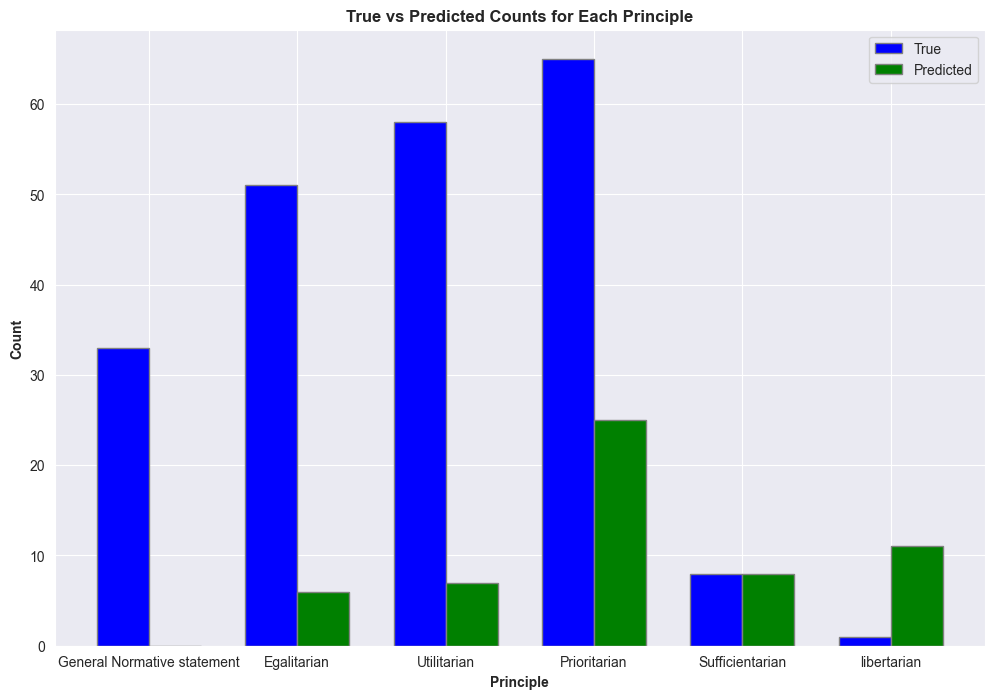

In [26]:
# Make a bar plot of the principle counts in each column
counts_true = final_principle_T06I5[["principle_1_true", "principle_2_true", "principle_3_true", "principle_4_true", "principle_5_true", "principle_6_true"]].sum()
counts_pred = final_principle_T06I5[["principle_1_pred", "principle_2_pred", "principle_3_pred", "principle_4_pred", "principle_5_pred", "principle_6_pred"]].sum()

# Define the labels for the principles
principles = ['General Normative statement', 'Egalitarian', 'Utilitarian', 'Prioritarian', 'Sufficientarian', 'libertarian']

# Define the bar width
bar_width = 0.35

# Define the positions of the bars on the x-axis
r1 = np.arange(len(counts_true))
r2 = [x + bar_width for x in r1]

# Create the plot with increased size
plt.figure(figsize=(12, 8))

# Create the bar plots
plt.bar(r1, counts_true, color='blue', width=bar_width, edgecolor='grey', label='True')
plt.bar(r2, counts_pred, color='green', width=bar_width, edgecolor='grey', label='Predicted')

# Add labels and title
plt.xlabel('Principle', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('True vs Predicted Counts for Each Principle', fontweight='bold')

# Add the principle labels to the x-axis
plt.xticks([r + bar_width / 2 for r in range(len(counts_true))], principles)

# Add a legend
plt.legend()

# Display the plot
plt.show()

### Build a confusionmatrix for the principles. Normalzed for the number of true instantces.

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, matthews_corrcoef, make_scorer, classification_report

Text(0.5, 1.0, 'Libertarain')

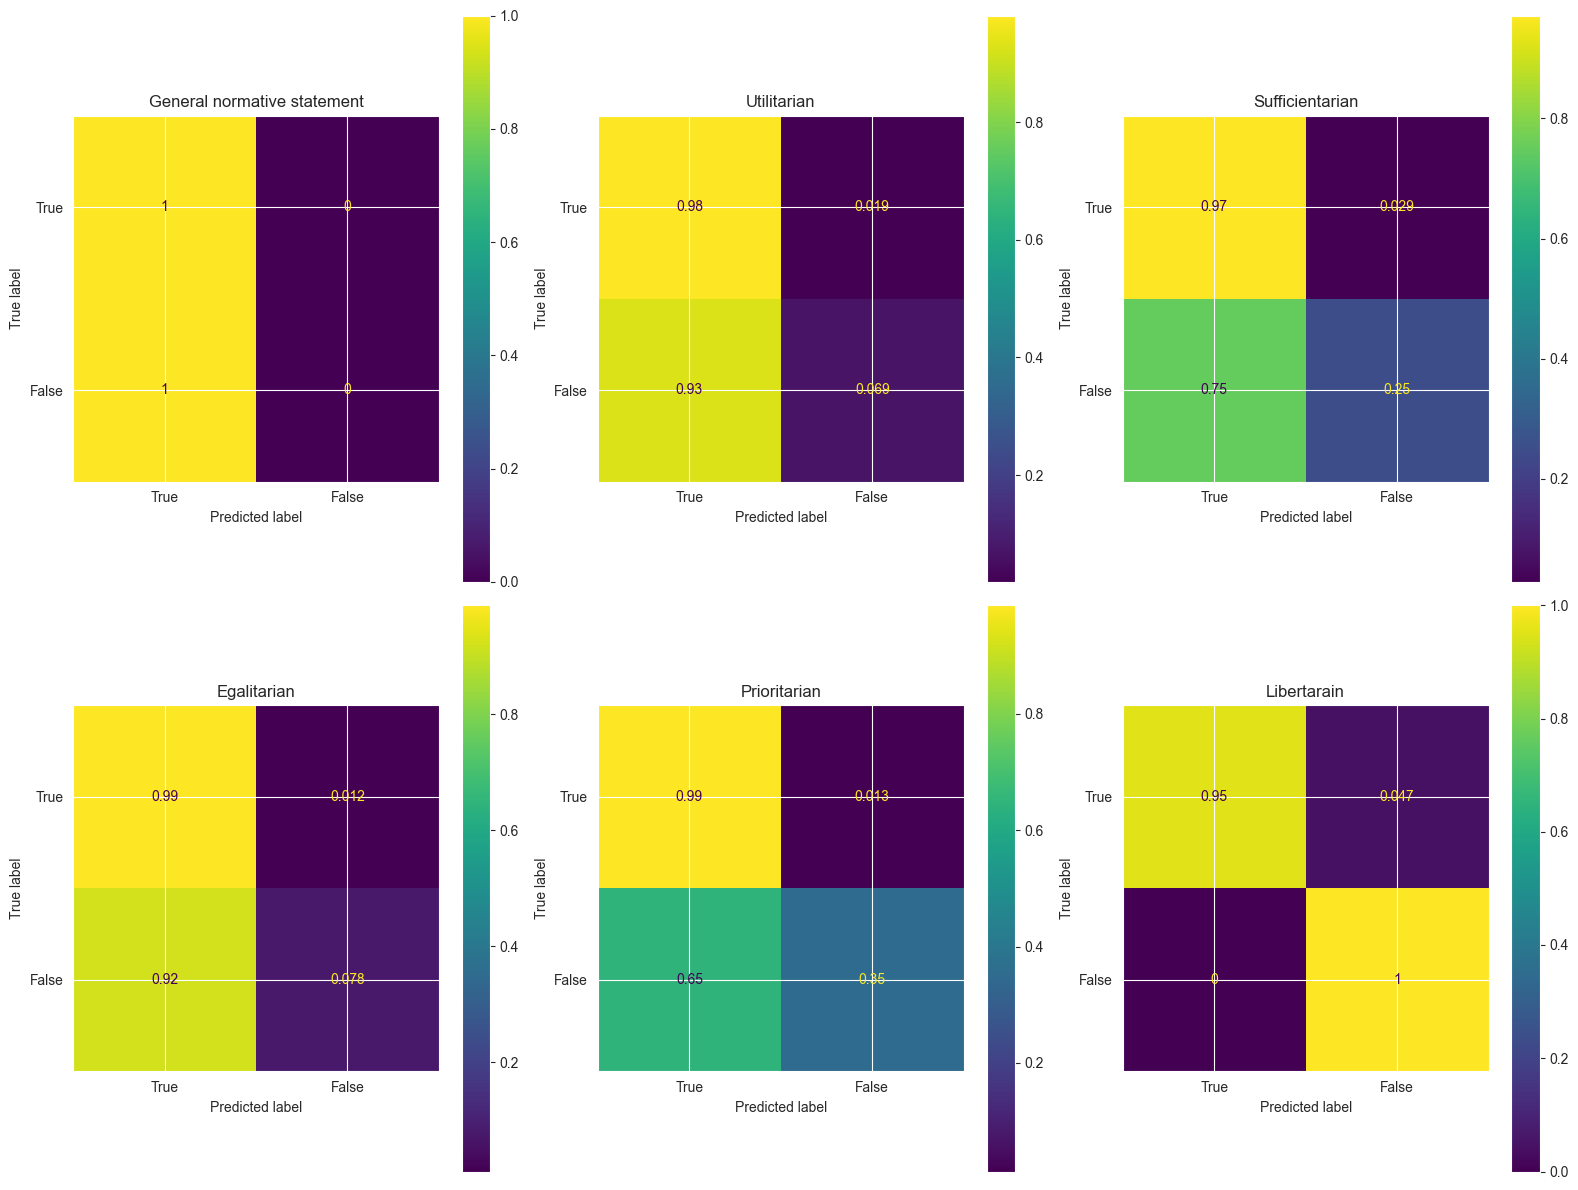

In [37]:
fig, ax = plt.subplots(2,3,figsize = (16,12))
fig.set_tight_layout(True)
ylabels = ['True', 'False']
cm1_ = confusion_matrix(y_true=final_principle_T06I5[["principle_1_true"]], y_pred=final_principle_T06I5[["principle_1_pred"]], normalize='true')
cm2_ = confusion_matrix(y_true=final_principle_T06I5[["principle_2_true"]], y_pred=final_principle_T06I5[["principle_2_pred"]], normalize='true')
cm3_ = confusion_matrix(y_true=final_principle_T06I5[["principle_3_true"]], y_pred=final_principle_T06I5[["principle_3_pred"]], normalize='true')
cm4_ = confusion_matrix(y_true=final_principle_T06I5[["principle_4_true"]], y_pred=final_principle_T06I5[["principle_4_pred"]], normalize='true')
cm5_ = confusion_matrix(y_true=final_principle_T06I5[["principle_5_true"]], y_pred=final_principle_T06I5[["principle_5_pred"]], normalize='true')
cm6_ = confusion_matrix(y_true=final_principle_T06I5[["principle_6_true"]], y_pred=final_principle_T06I5[["principle_6_pred"]], normalize='true')

cm1 = ConfusionMatrixDisplay(cm1_, display_labels=ylabels).plot(ax=ax[(0,0)])
cm2 = ConfusionMatrixDisplay(cm2_, display_labels=ylabels).plot(ax=ax[(1,0)])
cm3 = ConfusionMatrixDisplay(cm3_, display_labels=ylabels).plot(ax=ax[(0,1)])
cm4 = ConfusionMatrixDisplay(cm4_, display_labels=ylabels).plot(ax=ax[(1,1)])
cm5 = ConfusionMatrixDisplay(cm5_, display_labels=ylabels).plot(ax=ax[(0,2)])
cm6 = ConfusionMatrixDisplay(cm6_, display_labels=ylabels).plot(ax=ax[(1,2)])

# Add titles
cm1.ax_.set_title('General normative statement')
cm2.ax_.set_title('Egalitarian')
cm3.ax_.set_title('Utilitarian')
cm4.ax_.set_title('Prioritarian')
cm5.ax_.set_title('Sufficientarian')
cm6.ax_.set_title('Libertarain')